# Логистическая регрессия в одной строке
+ применяется для задач классификации
+ прогнозирует - относится ли конкретный пример данных к конкретной категории (классу)
+ т.е. выходной сигнал - категориальный, а не непрерывный

Предсказываем правдоподобие:
+ правдоподобие рака легких исходя из количества выкуренных пациентом сигарет

**Сигма-функция (сигмоид)**
+ Логистическая регрессия подгоняет к данным S-образную кривую - сигма-функцию
+ сигма-функция преобразуем входные признаки в одно значение вероятности
+ если возвращаемая вероятность превышет 50% - то предсказываем принадлежность к 1 классу 
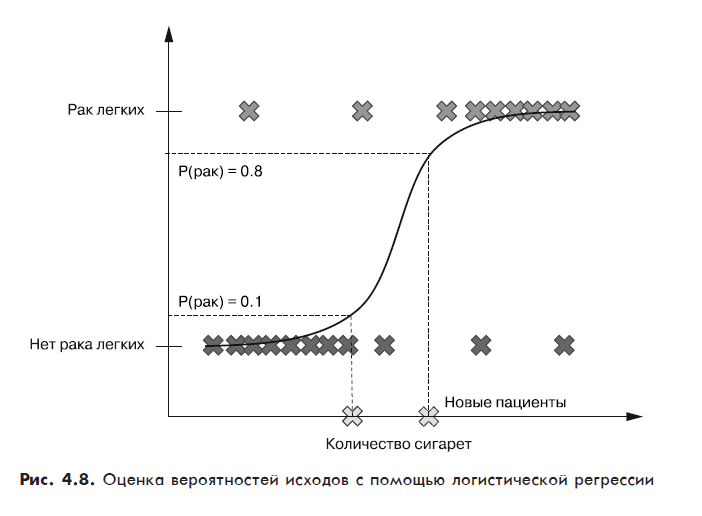

**Многоклассовая классификация**
+ Используем обобщение сигма-функции: многомерная логистчиеская функция (*softmax*), которая возвращает кортеж вероятностей, по одной для каждого класса


**Поиск максимального правдоподобия**
+ Основной вопрос - как выбрать правильную сигма-функцию, которая лучше всего соответствует обучающим данным.
+ для этого используем понятие **правдоподобие** (likelihood) - возвращаемая моделью вероятность для наблюдаемых обучащих данных
+ Нужно выбрать такую модель, которая лучше всего **натягивается** на имеющиеся данные, т.е. лучше всего аппроксимирует реальный процесс, в результате которого были сгенерированы обучающие данные

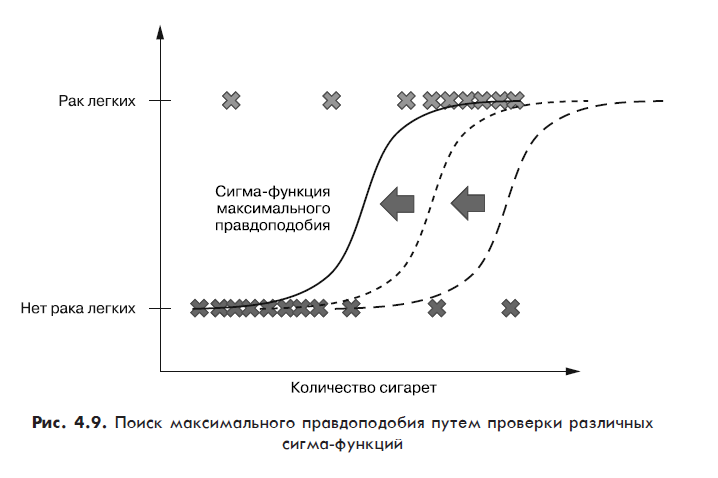

Вычисление правдоподобия конкретной модели для заданного набора обучающих данных:
+ вычисляем правдоподобие для каждой из обучающих точек данных
+ перемножаем правдоподобия всех точек
+ получаем правдоподобие для всего набора обучающих данных

Вычисление правдоподобия отдельной обучающей точки данных:
+ применим к данной точке  тестируему **сигму-функцию**, получить вероятность для нее

In [1]:
from sklearn.linear_model import LogisticRegression
import numpy as np

In [24]:
# Данные: (Количество сигарет, рак)
n = 4
X = np.array([[0, 'No'],
             [10, 'No'],
             [60, 'Yes'],
              [90, 'Yes']])
model = LogisticRegression().fit(X[:, 0].reshape(n,1), X[:,1])

### Объяснения по reshape
fit ожидаем на входе двумерный массив данных:
+ по одной строке на каждый обучающий пример данных
+ по одному столбцу для каждого признака 

Так как у нас только одно значение признака, то преобразуем одномерный  входной сигнал в двумерный массив с помощью `reshape`
+ первый аргумент `reshape` задает количество строк: можно явно указать **n** либо **-1**, чтобы рассчет был автоматически
+ второй аргумент - количество столбцов

In [25]:
X[:, 0].reshape(n,1)

array([['0'],
       ['10'],
       ['60'],
       ['90']], dtype='<U11')

In [26]:
X[:,1]

array(['No', 'No', 'Yes', 'Yes'], dtype='<U11')

In [31]:
model.predict([[2], [12],  [13], [40], [90]])

array(['No', 'No', 'No', 'Yes', 'Yes'], dtype='<U11')

In [34]:
# посмотреть на возвращаемые сигмой-функцией вероятности
for i in range(0, 100,10):
    print(i,  model.predict_proba([[i]]))

0 [[9.99568507e-01 4.31492826e-04]]
10 [[0.99612419 0.00387581]]
20 [[0.96611811 0.03388189]]
30 [[0.75982023 0.24017977]]
40 [[0.25979831 0.74020169]]
50 [[0.03748068 0.96251932]]
60 [[0.00430168 0.99569832]]
70 [[4.79086111e-04 9.99520914e-01]]
80 [[5.31753572e-05 9.99946825e-01]]
90 [[5.89987437e-06 9.99994100e-01]]
